#**Laboratorio 3 Computación Cuántica - Teletransportación cuántica**#

---
---
---


*Jose Andres Henao Alzate - CC 1036686332 - andres.henao9@udea.edu.co*

*Santiago Giraldo Tabares - CC 1000763987 - santiago.giraldot@udea.edu.co*

*Jakob Kuhn - kuhn.jakob@mail.de*

*Departamento de Ingeniería Electrónica, Facultad de Ingeniería, Universidad de Antioquia*

*Medellín, Colombia*

*Mayo, 2025*


---
---
---



##**Instalación de dependencias / Set-Up** ##

In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit-ibm-provider
!pip install mthree

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=07894178b61f953ce0e18036dc11540f2ba5b100b68e6ecb937cca23ce0fb8fb
  Stored in 

In [2]:
from qiskit import __version__ as qiskit_version
from qiskit_ibm_runtime import __version__ as runtime_version
from qiskit_aer import __version__ as aer_version
from platform import python_version

print('Qiskit Version:', qiskit_version)
print('IBM RunTime Version:', runtime_version)
print('Qiskit_Aer Version:', aer_version)
print('Python Version:', python_version())
print('2025 ©')

Qiskit Version: 2.0.2
IBM RunTime Version: 0.40.0
Qiskit_Aer Version: 0.17.0
Python Version: 3.11.12
2025 ©


In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import circuit_drawer
from qiskit.quantum_info import Statevector, state_fidelity
from qiskit_aer import AerSimulator
from typing_extensions import final
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import array_to_latex
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import *
from qiskit_aer import AerSimulator
import mthree

---
---
---
##**Definición del estado cuántico y cálculo de la fidelidad (10%)**##

---
### ***2.1. Implemente en la plataforma Qiskit un qubit |𝑸𝟎⟩ con el estado cuántico asignado según la Tabla 1.*** ###

El qubit asignado para esta labor, es el siguiente:

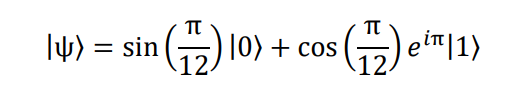

A fin de implementar el qubit asignado en la tabla 1 y preparar su estado, se realiza el código con la importación de librerías requeridas para esto. Posteriormente se definen los alfa y beta correspondientes, los cuales no son más que los coeficientes de los Kets. A fin de crear el qubit, se crea un circuito cuántico qc con un qubit, se inicializa el estado cuántico del qubit mediante sus coeficientes y se guarda el vector de estado. Luego se inicializa el simulador, se transpila el circuito de preparación, se ejecuta el simulador y se guarda el estado preparado para su posterior visualización en una esfera de Bloch.

ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)


Statevector([ 0.25881905+0.j, -0.96592583+0.j],
            dims=(2,))


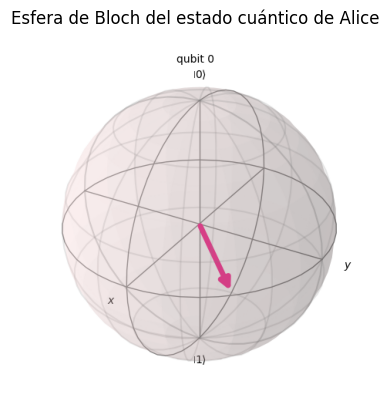

In [4]:
# definición de coeficientes
alpha = np.sin(np.pi / 12)
beta = -np.cos(np.pi / 12)


# Creación del circuito cuántico para representar el estado asignado.
qc = QuantumCircuit(1)
qc.initialize([alpha, beta], 0)
qc.save_statevector()

# simulación y compilación
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
final_state = result.data(0)['statevector']

#Almacenar el statevector
bloch = Statevector(final_state).data
x = 2 * np.real(np.conj(bloch[0]) * bloch[1])
y = 2 * np.imag(np.conj(bloch[0]) * bloch[1])
z = np.abs(bloch[0])**2 - np.abs(bloch[1])**2

#impresión del estado resultante del circuito
print(final_state)

#Graficando el estado obtenido mediante esfera de Bloch
bloch_fig = plot_bloch_multivector(final_state)
bloch_fig.savefig("bloch_sphere.png")  # Guardar como imagen
plt.imshow(plt.imread("bloch_sphere.png"))
plt.axis('off')
plt.title("Esfera de Bloch del estado cuántico de Alice")
plt.show()



---

###***2.2. Evalúe la fidelidad de su qubit |𝑸𝟎⟩ implementado en el paso anterior, a fin de verificar que sí corresponde con el estado cuántico asignado.*** ###



In [5]:
# Calcular la fidelidad entre el vector de estado generado planteado (objetivo) y el vector de estado obtenido tras el circuito (simulado)
fidelidad = state_fidelity(Statevector([alpha, beta]), final_state)
print("Fidelidad:", fidelidad)

Fidelidad: 1.0


Lo anterior es muestra de que el estado cuántico preparado a partir de los coeficientes asignados en la tabla 1 se corresponde fielmente con el estado cuántico preparado por el circuito transpilado y simulado mediante el AerSimulator.

Es esperable este grado de fidelidad, en tanto el AerSimulator es un simulador ideal sin consideraciónes de ruido ni modelos estadísticos fieles a HW real.

---
---
---
#**Diseño e implementación de circuito cuántico (60%)**#

---
---
###***3.1. Diseñe un circuito cuántico que mediante teletransportación cuántica, le transmita a “Bob” la información de su qubit |𝑸𝟎⟩, considerando que el estado cuántico entrelazado compartido entre “Alice” y “Bob” es el Estado W.***###

El diseño del circuito cuántico de teletransportación mediante estado W se realizó a partir del diseño del clásico circuito de teletransportación mediante estado de Bell. Este circuito tradicional fue extrapolado, reemplazando el segmento de generación de estado de Bell por un segmento de circuito de generación de estado W balanceado.


Lo anterior implicó necesariamente agregar un registro cuántico adicional, puesto que el estado W se compone de tres qubits, a diferencia del estado Bell que solo requiere de dos. Desde ya, se anticipa que esto conlleva a la necesidad de agregar también un registro clásico adicional sobre el cuál colapsar el qubit adicional.


Lo anterior, fue realizado a sugerencia del docente del curso. No obstante, se pueden explorar otras formas menos directas de generar el circuito.


Luego, se entrelaza normalmente el estado de Alice con el estado W mediante alguno de sus qubits. Respecto al circuito de Bell, hasta ahora no hay mayor diferencia.


Finalmente, se agrega el corazón del circuito, y lo que lo diferencia del circuito de Bell. Las correcciones condicionales al qubit de Bob. En el estado de Bell, se emplean X y Z como compuertas controladas por las medidas de los qubits del estado W. No obstante, y como se aumentó en uno la cantidad de qubits, y como el entrelazamiento fuerte pero diferente al de Bell, se requieren otras correcciones adicionales (rotaciones o negaciones) tambien condicionadas por las mediciones.


Finalmente, queda un qubit m sin utilizar, pues no participa activamente en la teletransportación. Sin embargo, se adelanta desde ya que dicho qubit m puede ser empleado, de la misma forma que los de más, para aplicar correcciones condicionadas adicionales.


A continuación se adjunta el circuito:



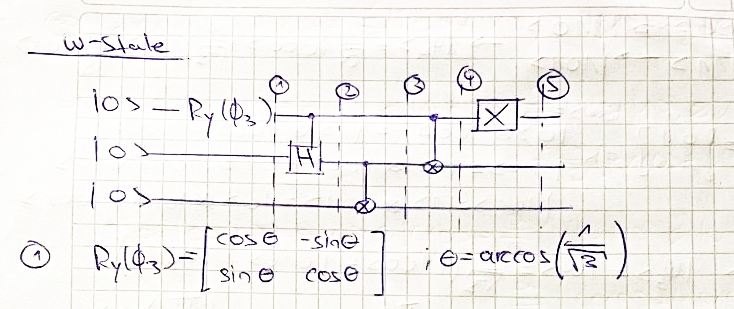

[*BOSQUEJO ESTADO W INICIAL*]

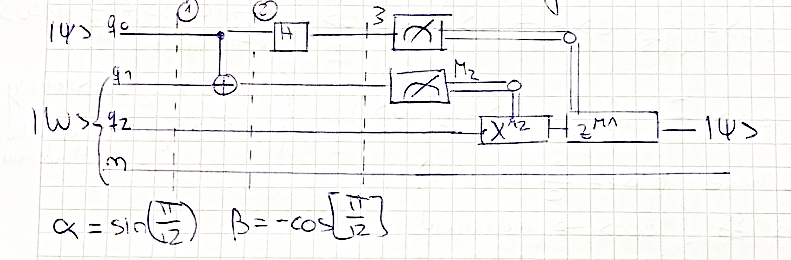

[*BOSQUEJO DE CIRCUITO CON ALICE Y SIN CORRECCIONES CONDICIONALES ADICIONALES*]

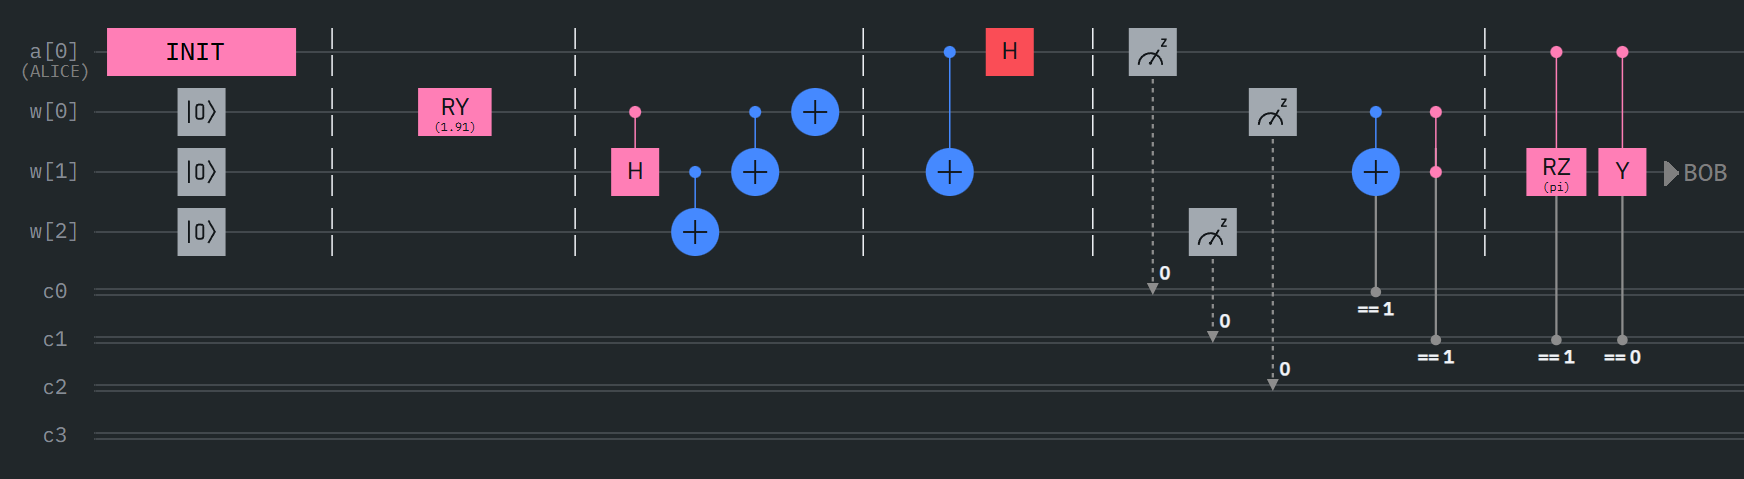

[*CIRCUITO DISEÑADO FINAL (SIN USO DEL QUBIT m)*]

---
#### ***3.1.1 Desarrollo matemático del circuito Qiskit para teletransportación cuántica usando un estado W*** ####

## Introducción

La teletransportación cuántica es un protocolo que permite transferir el estado de un qubit entre dos partes (Alice y Bob), sin necesidad de enviar el qubit directamente. Para lograrlo, se requiere un canal de entrelazamiento cuántico y comunicación clásica. En este caso, utilizamos como canal un **estado W** de tres qubits.

Este informe presenta el desarrollo **matemático completo** del siguiente circuito Qiskit, el cual genera un estado W entre tres qubits (`qw[0], qw[1], qw[2]`), prepara un estado de Alice (`qa[0]`), y teletransporta la información cuántica al qubit `qw[1]` (Bob), usando operaciones condicionadas por medidas clásicas.

---

## Estado de entrada

El estado de Alice se define como:
$$
|\psi\rangle_A = \alpha |0\rangle + \beta |1\rangle
$$
donde, según el código:

$$
\alpha = \sin\left(\frac{\pi}{12}\right),\quad \beta = \cos\left(\frac{\pi}{12}\right)e^{i\pi} = -\cos\left(\frac{\pi}{12}\right)
$$

Por tanto:

$$
|\psi\rangle_A = \sin\left(\frac{\pi}{12}\right)|0\rangle - \cos\left(\frac{\pi}{12}\right)|1\rangle
$$

Este qubit se encuentra inicialmente desacoplado del canal W:

$$
|\Psi_0\rangle = |\psi\rangle_A \otimes |000\rangle_{w}
$$

---

## Construcción del estado W

El circuito crea un estado W entre los tres qubits del canal `qw[0], qw[1], qw[2]`. El estado W se define como:

$$
|W\rangle = \frac{1}{\sqrt{3}}(|100\rangle + |010\rangle + |001\rangle)
$$

### Paso a paso:

1. Se aplica una rotación $R_y(2\theta)$ sobre `qw[0]`, con:

$$
\theta = \arccos\left(\frac{1}{\sqrt{3}}\right) \Rightarrow R_y(2\theta) =
\begin{bmatrix}
\cos(2\theta) & -\sin(2\theta) \\
\sin(2\theta) & \cos(2\theta)
\end{bmatrix}
$$

Aplicando esto a $ |0\rangle $:

$$
|\phi\rangle = R_y(2\theta)|0\rangle = \frac{1}{\sqrt{3}}|0\rangle + \sqrt{\frac{2}{3}}|1\rangle
$$

2. Se aplican compuertas para propagar esta superposición al resto del canal:

- `CH(qw[0], qw[1])`: control-Hadamard
- `CX(qw[1], qw[2])`
- `CX(qw[0], qw[1])`
- `X(qw[0])`

El resultado final es el estado W:

$$
|W\rangle = \frac{1}{\sqrt{3}}(|100\rangle + |010\rangle + |001\rangle)
$$

El estado compuesto queda como:

$$
|\Psi_1\rangle = |\psi\rangle_A \otimes |W\rangle
$$

---

## Entrelazamiento con el canal W

Se aplica:

1. `CX(qa[0], qw[1])`
2. `H(qa[0])`

Estas operaciones transforman el sistema hacia una superposición y entrelazamiento entre Alice y el canal W. En general:

$$
CX_{A\to qw[1]}:\quad \alpha|0\rangle|x\rangle + \beta|1\rangle|x\oplus1\rangle
$$

$$
H_A:\quad |0\rangle \rightarrow \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle),\quad |1\rangle \rightarrow \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

El estado se convierte en una superposición de términos de la forma:

$$
\frac{1}{\sqrt{2}}[\alpha(|0\rangle + |1\rangle)|\chi_0\rangle + \beta(|0\rangle - |1\rangle)|\chi_1\rangle]
$$

donde $ |\chi_0\rangle, |\chi_1\rangle $ son los estados de los qubits del canal tras la acción del CX.

---

## Medidas y colapso del estado

Se realizan tres medidas:

- `measure(qa[0], c0)` → Medida del qubit de Alice
- `measure(qw[2], c1)` → Parte del canal W
- `measure(qw[0], c2)` → Parte del canal W

Estas medidas colapsan el estado cuántico en una de 8 posibles combinaciones (3 bits clásicos).

Denotamos los resultados como:

$$
(m_0, m_1, m_2) = (\text{c0}, \text{c1}, \text{c2}) \in \{0,1\}^3
$$

---

## Correcciones condicionadas

Según los bits clásicos obtenidos, se aplican correcciones sobre `qw[1]` (qubit de Bob) para reconstruir el estado original.

Las correcciones incluyen:

- Si `c0 = 1`: aplicar `CX(qw[0], qw[1])`
- Si `c1 = 1`: aplicar `CZ(qw[0], qw[1])`
- Si `c1 = 1`: aplicar también `CRZ(pi, qa[0], qw[1])`
- Si `c1 = 0`: aplicar `CZ(qa[0], qw[1])`
- Si `c0 = 0 and c2 = 0 and c1 = 0`: aplicar `X(qw[1]) (Este uso de qubit "m", ayuda a garantizar fidelidad máxima)`

Estas correcciones dependen del valor específico de las medidas y forman parte esencial del protocolo de teletransportación.

---

## Estado final en Bob

Tras aplicar las correcciones, el estado final en `qw[1]` (Bob) es:

$$
\rho_{\text{Bob}} = \text{Tr}_{\text{resto}}(|\Psi_{\text{final}}\rangle\langle\Psi_{\text{final}}|)
$$

Idealmente:

$$
\rho_{\text{Bob}} = |\psi\rangle\langle\psi|,\quad \text{es decir, el estado original de Alice}
$$

---

## Observación importante

> El circuito actual **no contempla todas las combinaciones** posibles de bits clásicos en sus `if_test`, por lo tanto, **existen rutas en las cuales Bob recibe un estado incorrecto**, con fidelidad $ F < 1 $. Esta imperfección puede ser corregida ampliando la lógica condicional del circuito.

---

## Conclusión

Este desarrollo matemático muestra cómo el estado W puede utilizarse como recurso de entrelazamiento para implementar teletransportación cuántica. La implementación en Qiskit revela la necesidad de considerar todos los casos posibles para asegurar fidelidad total en el qubit receptor.



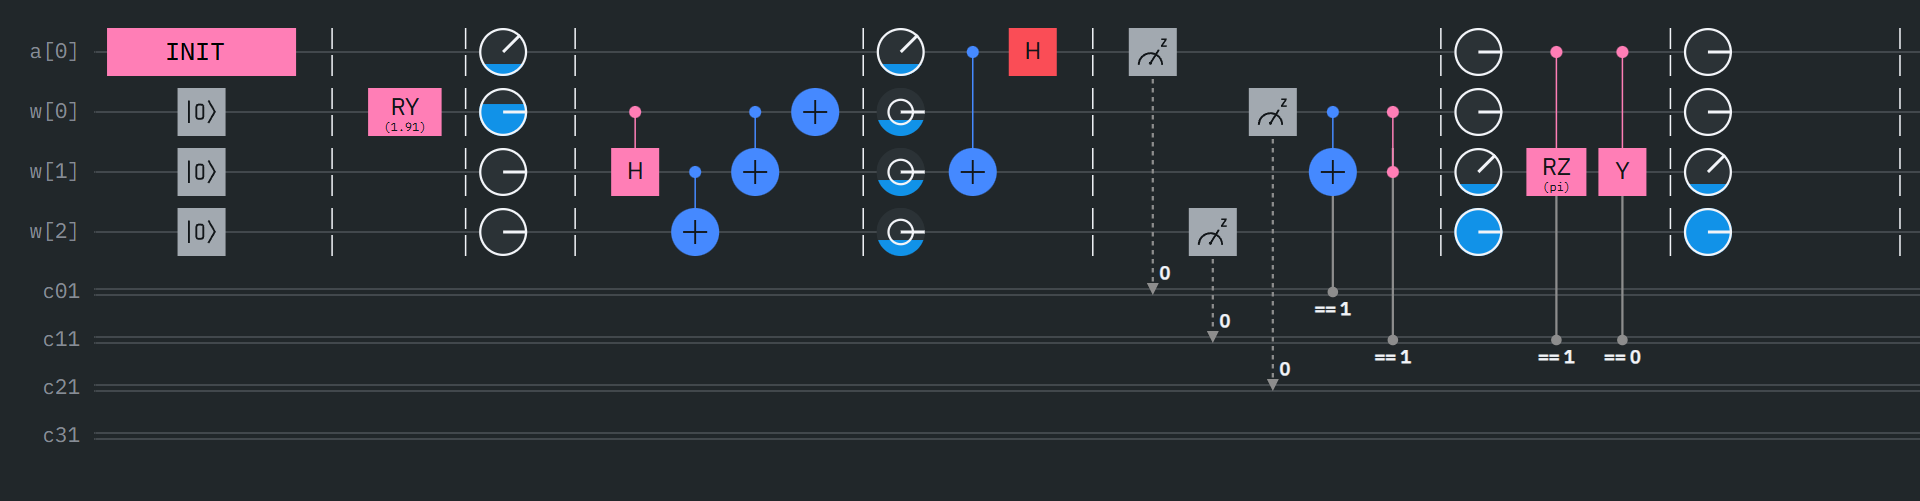

---
#### ***3.1.2. De acuerdo a su demostración matemática, ¿qué utilidad puede tener el tercer qubit del estado W que no interviene en las operaciones cuánticas entre “Alice y “Bob”? De aquí en adelante, llamemos a este qubit m.***####

## Utilidad del tercer qubit del estado W (qubit *m*)

De acuerdo con la demostración matemática realizada y el análisis del proceso de teletransportación utilizando el estado $ W $, se puede discutir la posible utilidad del tercer qubit del sistema, al que llamaremos $ m $. A continuación se presentan tres observaciones clave:

1. **El qubit $ m $ no participa activamente en el proceso de teletransportación**, ya que no se le aplican compuertas ni se le realiza ninguna medición durante la transmisión de la información cuántica entre “Alice” y “Bob”. Sin embargo, **sin este tercer qubit no sería posible preparar el estado $ W $**, que es esencial para el protocolo. Recordemos que el estado $ W $ de tres qubits está definido como:


   $$
   \left| W \right\rangle = \frac{1}{\sqrt{3}} \left( \left| 100 \right\rangle + \left| 010 \right\rangle + \left| 001 \right\rangle \right)
   $$


   Cada uno de los tres qubits tiene igual probabilidad de encontrarse en el estado excitado $|1\rangle$, por lo tanto, todos los qubits son fundamentales en la preparación inicial del entrelazamiento.

2. **El qubit $ m $ permanece entrelazado con los otros dos qubits, incluso si no es manipulado directamente**. Esto significa que cualquier perturbación, medición o decoherencia que afecte al qubit $ m $, podría influir en el estado cuántico de los qubits de “Alice” y “Bob”. Esta propiedad refleja una característica esencial del entrelazamiento cuántico en estados $ W $: el entrelazamiento es más robusto que en los estados GHZ, ya que **al medir uno de los qubits, los otros dos pueden seguir entrelazados**.

3. Si bien el circuito inicial se diseña sin emplear mediciones sobre el qubit m, **lo cierto es que este mismo puede ser medido y utilizado para ampliar la lógica condicional del circuito** y cubrir todos los posibles casos con el fin de garantizar la teletransportación. En este mismo notebook se elabora el circuito en qiskit **considerando la actuación de dicho qubit m**. No obstante **tenga en cuenta que según la disponibilidad tecnológica, podría llegar o no a implementar condicionales anidados en el circuito**, lo que determinará si puede o no usar el qubit m en la forma en la que se propone en este notebook.

4. **Por lo tanto, se puede considerar al qubit $ m $ como una herramienta útil para propósitos adicionales, como:**
   - **Detección de decoherencia:** Si se realiza una medición sobre el qubit $ m $, podría dar indicios sobre si el sistema ha sufrido decoherencia. Esto puede tener aplicaciones en protocolos de **criptografía cuántica**, donde la integridad del entrelazamiento es clave para detectar intrusiones o pérdidas de información.
   - **Teletransportación cuántica en cascada o múltiples pasos:** Dado que el qubit $ m $ permanece entrelazado, podría ser aprovechado para **extender la teletransportación** a otros participantes sin requerir el reinicio del proceso desde cero.
   - **Intercambio de entrelazamiento (entanglement swapping):** En teoría, el qubit $ m $ podría utilizarse en esquemas más complejos donde se desea redirigir el entrelazamiento cuántico entre distintos pares de qubits, aprovechando la estructura del estado $ W $.

   Si bien algunos de estos usos potenciales aún requieren investigación adicional y verificación experimental, **es razonable pensar que el qubit $ m $ ofrece oportunidades para enriquecer o extender protocolos cuánticos más allá del caso básico de teletransportación entre dos partes**.



---
####***3.1.3. Presente un gráfico que delimite claramente la etapa de su circuito que implementa el Estado W, y la etapa del circuito que implementa la teletransportación cuántica.***####

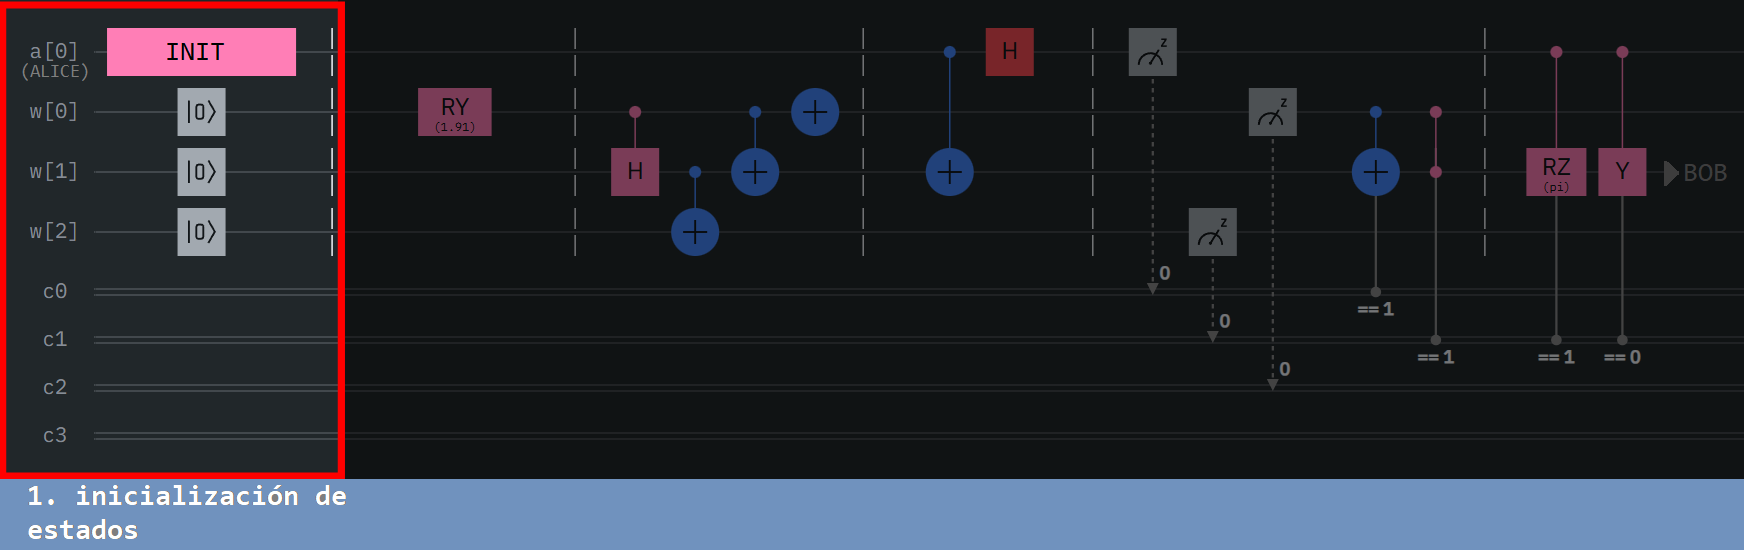

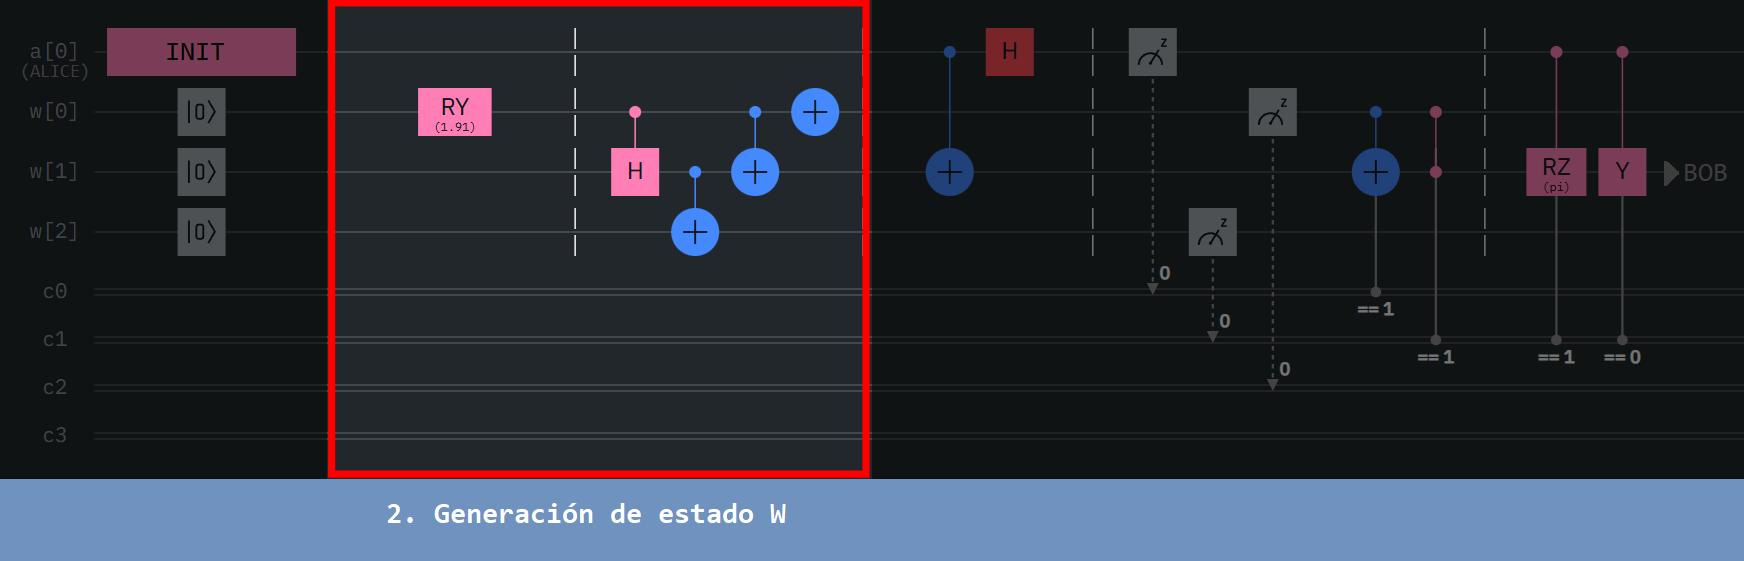

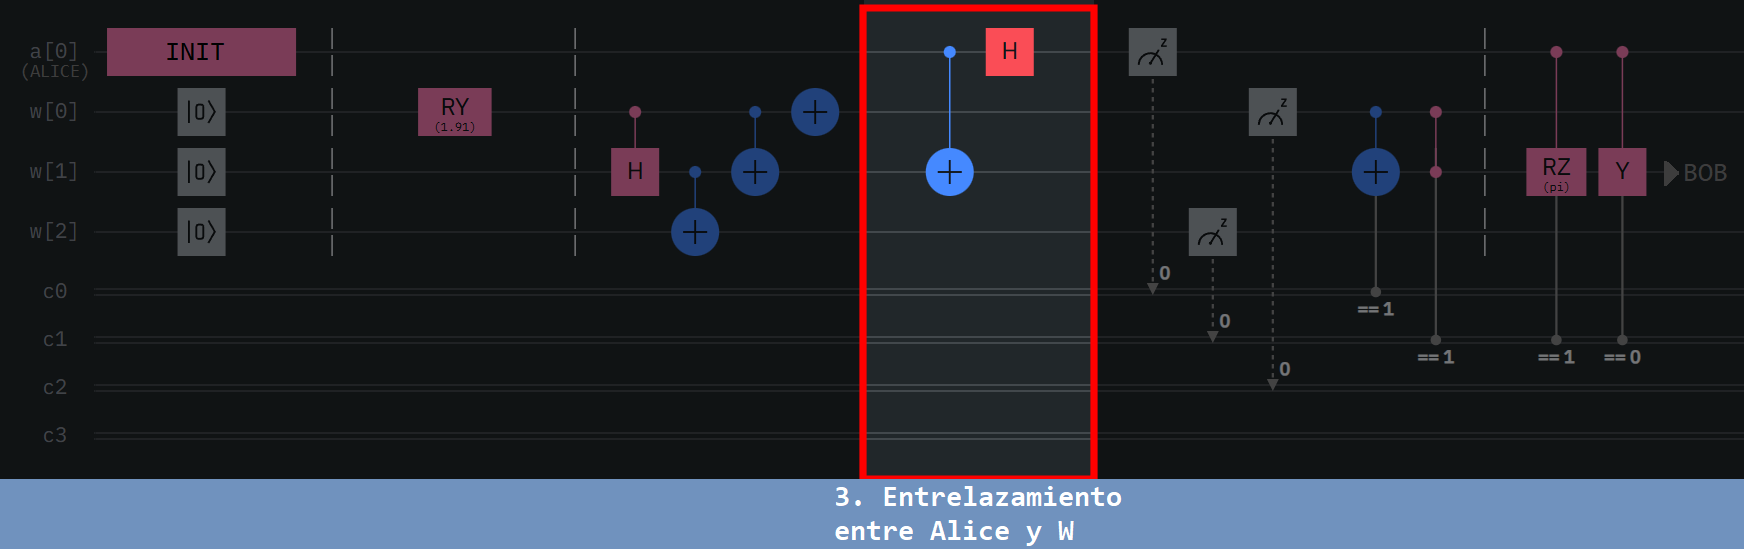

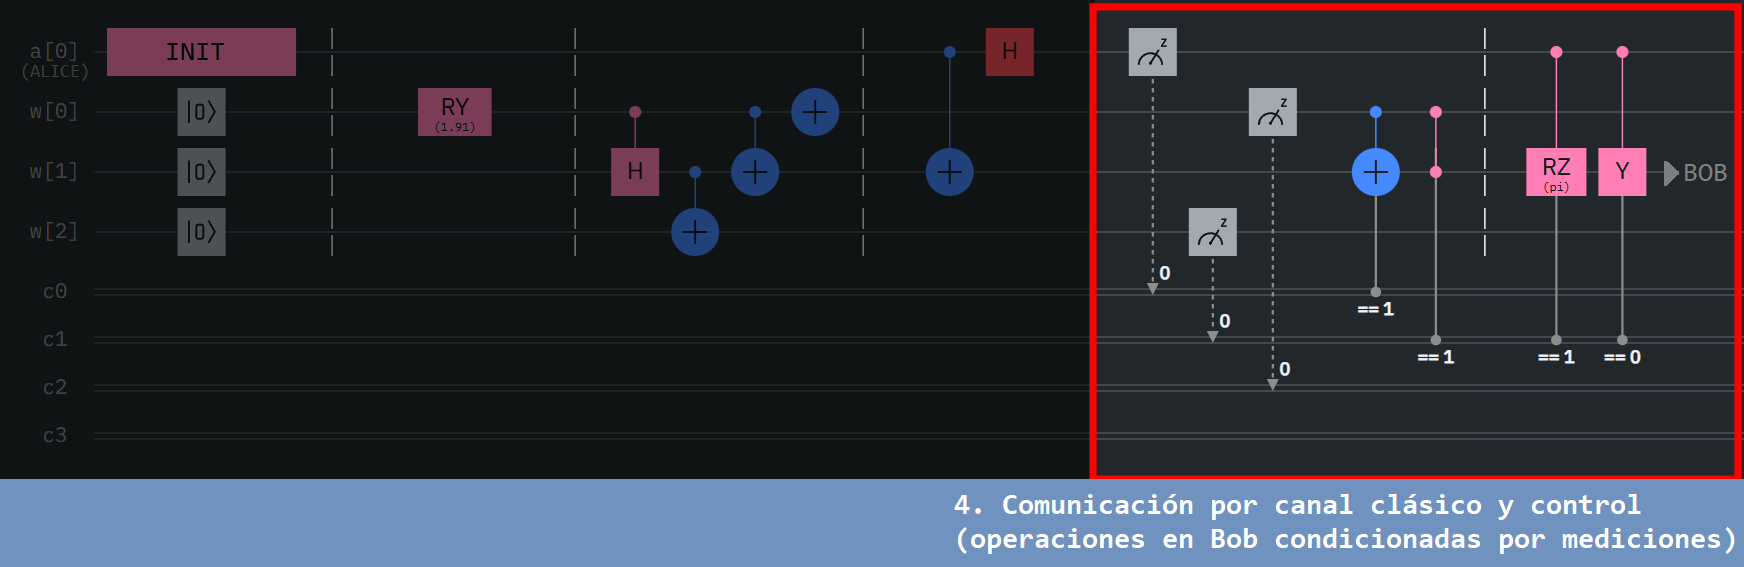

---
---
###***3.2. Implemente en la plataforma Qiskit su circuito resultante, teniendo en cuenta los tutoriales estudiados en clase sobre Teletransportación Cuántica y el estado W, los cuales se encuentran disponibles en:*** ###

---
#### ***3.2.1. Presente en Qiskit el vector de estado (statevector) del qubit |𝑸𝟎⟩ inicialmente en poder de “Alice”***####

In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity
from qiskit.visualization import plot_bloch_multivector, array_to_latex, plot_distribution
from qiskit_aer import AerSimulator

# Registros
qa = QuantumRegister(1, "qa")   # qubit de Alice
qw = QuantumRegister(3, "qw")   # w-state channel
c0 = ClassicalRegister(1, "c0") # medida de w[0]
c1 = ClassicalRegister(1, "c1") # medida de Alice Z
c2 = ClassicalRegister(1, "c2") # medida de Alice X
c3 = ClassicalRegister(1, "c3") # medida final de Bob

qc = QuantumCircuit(qa, qw, c0, c1, c2, c3)

# 1) Estado de Alice fijo
alpha = np.sin(pi/12)
beta  = np.cos(pi/12)*np.exp(1j*pi)
psi   = Statevector([alpha, beta])

display(array_to_latex(Statevector(psi), prefix="\\ket{\psi_{Alice}} = "))
print(psi)


<IPython.core.display.Latex object>

Statevector([ 0.25881905+0.00000000e+00j, -0.96592583+1.18291797e-16j],
            dims=(2,))


---
####***3.2.2. Igualmente en Qiskit represente mediante esferas de Bloch el estado cuántico del qubit |𝑸𝟎⟩ de “Alice”, y el estado cuántico recibido por “Bob” en su circuito cuántico.*** ####

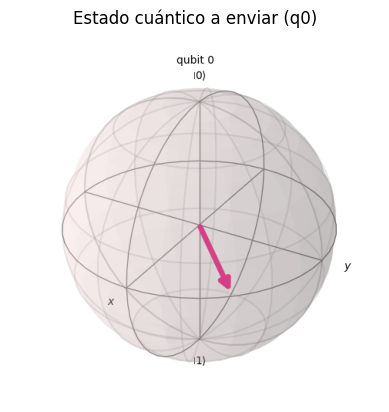

In [12]:
fig = plot_bloch_multivector(psi)
fig.savefig("bloch_input.png")
plt.imshow(plt.imread("bloch_input.png"))
plt.axis('off')
plt.title("Estado cuántico a enviar (q0)")
plt.show()

qc.reset(qa[0])
qc.reset(qw[0])
qc.reset(qw[1])
qc.reset(qw[2])

# 2) Inicializar Alice y W
qc.initialize(psi.data, qa[0])
qc.barrier()


# 3) Preparar W estándar en w[0],w[1],w[2]
qc.ry(2*np.arccos(1/np.sqrt(3)), qw[0])
qc.ch(qw[0],qw[1])
qc.cx(qw[1],qw[2])
qc.cx(qw[0],qw[1])
qc.x(qw[0])
qc.barrier()


# 4) Medir selector w[0]
qc.cx(qa[0], qw[1])
qc.h(qa[0])
qc.barrier()

# 5) mediciones iniciales (canal clasico)

qc.measure(qa[0],c0[0])
qc.measure(qw[2],c1[0])
qc.measure(qw[0],c2[0])
qc.barrier()

# 6) compuertas condicionadas (parte 1)


with qc.if_test((c0,1)):
  qc.cx(qw[0],qw[1])
with qc.if_test((c1,1)):
  qc.cz(qw[0],qw[1])


# 7) compuertas condicionadas (parte 2)


with qc.if_test((c1,1)):
  qc.crz(pi, qa[0], qw[1])
with qc.if_test((c1,0)):
  qc.cz(qa[0], qw[1])

# Descomentar las siguientes lineas si se desea emplear la última corrección condicional sobre el qubit m.
# OJO, SI DESEA EJECUTAR EN HW REAL, MANTENGALAS COMENTADAS. EL SOPORTE PARA CONDICIONALES ANIDADOS FUE REMOVIDO
# Si solo desea simular con AER SIMULATOR, puede descomentarlas.

with qc.if_test((c0,0)):
  with qc.if_test((c2,0)):
    with qc.if_test((c1,0)):
      qc.x(qw[1])










In [13]:
# Definición de simuladores requeridos
statevector_simulator = AerSimulator(method='statevector')
circuit_simulator = AerSimulator()

In [14]:
# Simulación del Vector de Estado a la salida del circuito
qc_statevector = qc.copy()
qc_statevector.save_statevector()

In [15]:
# Transpilación para posteriormente realizar la simulación del vector de estado resultante
circ_statevector = transpile(qc_statevector, statevector_simulator)

# Ejecución y obtención del statevector
result = statevector_simulator.run(circ_statevector).result()
statevector = result.get_statevector(circ_statevector)

ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)


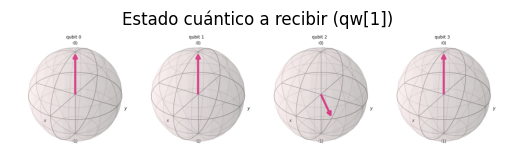

<IPython.core.display.Latex object>

Statevector([-0.25881905+9.61481343e-17j,  0.        -0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        -0.00000000e+00j,
              0.96592583-5.99032469e-16j, -0.        +0.00000000e+00j,
             -0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        -0.00000000e+00j,
             -0.        +0.00000000e+00j,  0.        -0.00000000e+00j,
             -0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.        +0.00000000e+00j],
            dims=(2, 2, 2, 2))


In [16]:
# Generación de esferas de Bloch de estados resultantes del circuito
fig2 = plot_bloch_multivector(statevector)
fig2.savefig("bloch_output.png")
plt.imshow(plt.imread("bloch_output.png"))
plt.axis('off')
plt.title("Estado cuántico a recibir (qw[1])")
plt.show()


display(array_to_latex(Statevector(statevector), prefix="\\ket{Salida_{statevector}} = "))
print(statevector)

In [17]:
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import array_to_latex

# qw[1] es el índice 2 del vector total (Alice, qw[0], qw[1], qw[2])
rho_bob = partial_trace(statevector, [0, 1, 3])  # trazamos fuera todo excepto qw[1]

# Extraer autovalores y autovectores
eigvals, eigvecs = np.linalg.eigh(rho_bob.data)

# Verifica si el mayor autovalor ≈ 1 (estado puro)
if np.isclose(np.max(eigvals), 1.0):
    # Estado puro → usar autovector correspondiente
    pure_state = eigvecs[:, np.argmax(eigvals)]
    bob_sv = Statevector(pure_state)
    display(array_to_latex(bob_sv, prefix="\\ket{Bob} = "))
    print(bob_sv)
else:
    print("Bob está en un estado mixto:")
    print(rho_bob)



<IPython.core.display.Latex object>

Statevector([ 0.25881905+0.00000000e+00j, -0.96592583+2.40202746e-16j],
            dims=(2,))


In [68]:
qc.barrier() # Uso de "barrier" (barrera) para separar las diversas etapas
# colapsar estado de Bob. Para posteriormente repetir el experimento multiples veces y hallar los
# coeficientes a partir de los conteos de 1s y 0s

# Copia limpia del circuito sin medidas ni colapsos
qc_counts = qc.copy()

# Agregamos solo la medida de Bob para conteos
qc_counts.barrier()

qc.measure(qw[1], c3[0])

# Gráfica del circuito completo de Teletransportación Cuántica
#qc.draw('mpl')
#plt.show()

#(imagen grande, clicar sobre ella para visualizarla completa. Si incluyó condicionales anidados para corrección adicional, probablemente se dibujen debajo)

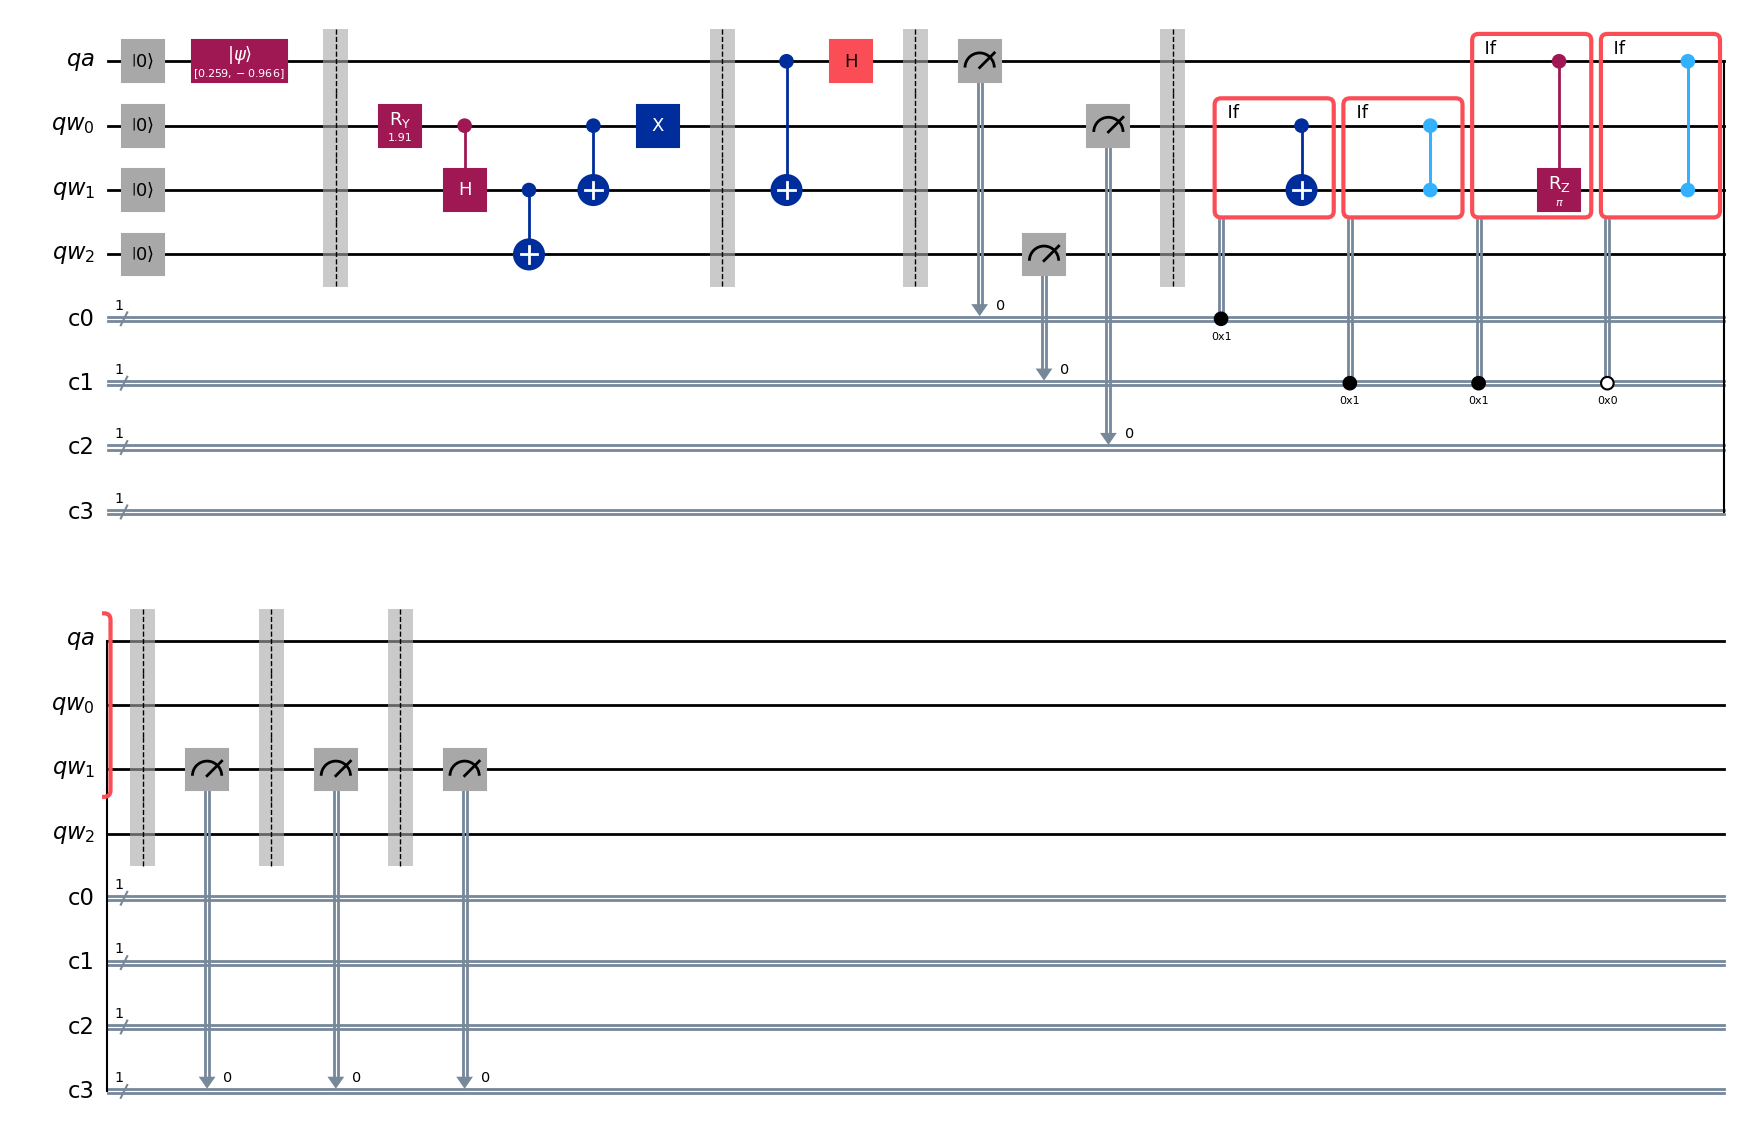

In [70]:
qc.draw('mpl')

---
---
### ***3.3. Realice la simulación en Qiskit de su circuito implementado:*** ###

In [19]:
sim = AerSimulator()

result = sim.run(transpile(qc, sim), shots=16000).result()
counts_total = result.get_counts()


ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)


---
##### 3.3.1. Mida el estado cuántico recibido por “Bob”, y de la misma manera como se indica en el anterior Tutorial sobre Teletransportación Cuántica, evalúe si las amplitudes de los kets |𝟎⟩ y |𝟏⟩ corresponden según lo esperado #####

#####Compare explícitamente el qubit final recibido por “Bob”, con el estado cuántico asignado según la Tabla 1. #####

Probabilidades de Bob en rama '000': {'0': 0.06771417882528993, '1': 0.93228582117471}


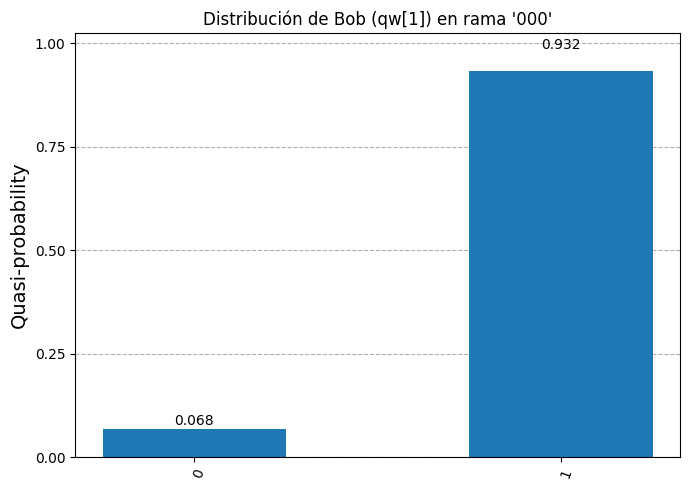

In [20]:
from collections import Counter

bob_counts = Counter()

for key, val in counts_total.items():
    key = key.replace(' ', '')  # eliminar espacios por si acaso

    # Orden real: c3 c2 c1 c0
    c3_bit = key[0]      # qw[1] (Bob)
    c2_c1_c0 = key[1:]   # qw[0], w[0], w[2]

    if c2_c1_c0 == '000':  # rama sin corrección
        bob_counts[c3_bit] += val

# Mostrar resultados
if bob_counts:
    total = sum(bob_counts.values())
    probs = {k: v / total for k, v in bob_counts.items()}
    print("Probabilidades de Bob en rama '000':", probs)
    plot_distribution(probs, title="Distribución de Bob (qw[1]) en rama '000'")
else:
    print(" No se encontró la rama '000'. Revisar el orden de registros o counts_total.")

plot_distribution(bob_counts, title="Distribución de Bob (qw[1]) en rama '000'")
#plt.show()


ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)


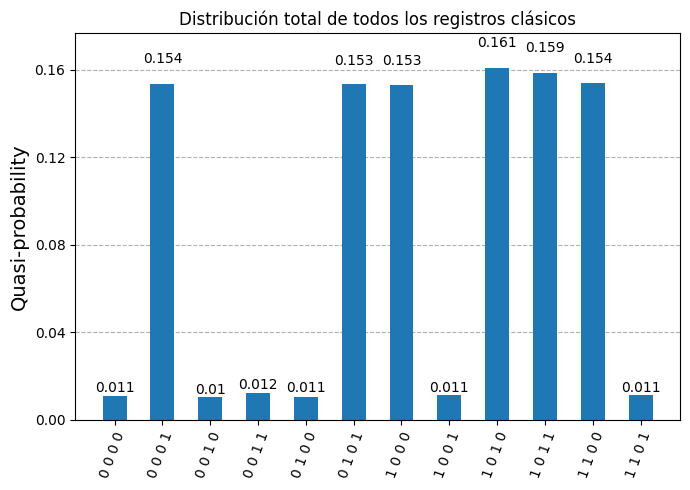

In [21]:
result = sim.run(transpile(qc, sim), shots=16000).result()
counts_total = result.get_counts()
plot_distribution(counts_total, title="Distribución total de todos los registros clásicos")

In [22]:
# Obtener amplitudes a partir de las probabilidades
amp_0 = np.sqrt(probs.get('0', 0))
amp_1 = np.sqrt(probs.get('1', 0))

# Determinar los signos de fase si se conocen, o asumir positivos para magnitud
latex_bob = (
    "\\ket{\\text{Bob}} = "
    f"{amp_0:.4f}\\ket{{0}} + {amp_1:.4f}\\ket{{1}}"
)

from IPython.display import display, Math
display(Math(latex_bob))

<IPython.core.display.Math object>

De lo anterior, se alcanza a observar que las probabilidades de 0 y 1 obtenidas tras ejecutar el circuito múltiples veces, se corresponden (o llegan a valores muy similares) a los que se pretendieron enviar desde Alice.

---
####***3.3.2. En su informe, presente sus comparaciones entre la información recibida por “Bob” en la simulación realizada en Qiskit, y la información esperada según su demostración matemática descrita en el ítem 3.1.1.*** ####

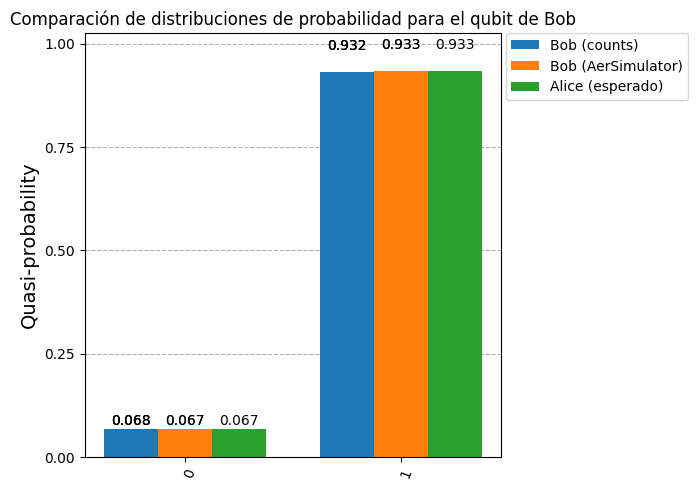

In [23]:
# Estado 1: reconstruido desde los counts
probs_counts = {
    '0': np.abs(amp_0)**2,
    '1': np.abs(amp_1)**2
}

# Estado 2: simulado (aer statevector) :  extraer vector puro desde rho_bob
eigvals, eigvecs = np.linalg.eigh(rho_bob.data)
bob_sv = Statevector(eigvecs[:, np.argmax(eigvals)])  # solo si estado puro
probs_sv = {
    '0': np.abs(bob_sv.data[0])**2,
    '1': np.abs(bob_sv.data[1])**2
}

# Estado 3: Alice (estado original)
probs_alice = {
    '0': np.abs(psi.data[0])**2,
    '1': np.abs(psi.data[1])**2
}

# Comparación
plot_distribution(
    [probs_counts, probs_sv, probs_alice],
    legend=['Bob (counts)', 'Bob (AerSimulator)', 'Alice (esperado)'],
    title='Comparación de distribuciones de probabilidad para el qubit de Bob'
)


---
####***3.3.3. Sobre la utilidad del qubit m, según la demostración en el item 3.1.2.*** ####

Se infiere que retirar el control condicional del qubit m en la operación final de corrección de estado, puede reducir significamente la fidelidad de la operación en tanto se introducen estados finales [a0,qw0,qw2] a los cuales no se les asigna un operador de corrección. Dicho en otras palabras, se infiere que habrán más casos en los que Bob NO recibirá el estado de Alice correctamente en tanto faltarían operaciones de corrección.

Esto podría quedar evidente en la ejecución sobre HW real en tanto, a la fecha (30 de Mayo de 2025), se ha removido el soporte al uso de condicionales anidados, los cuales están presentes en este circuito propuesto. Con lo que habría que retirar la última compuerta NOT para esta ejecución.

---
---
###***3.4. Realice ahora la ejecución real de su circuito en uno de los procesadores cuánticos disponibles en IBM.*** ###

<IPython.core.display.Latex object>

Statevector([ 0.25881905+0.00000000e+00j, -0.96592583+1.18291797e-16j],
            dims=(2,))


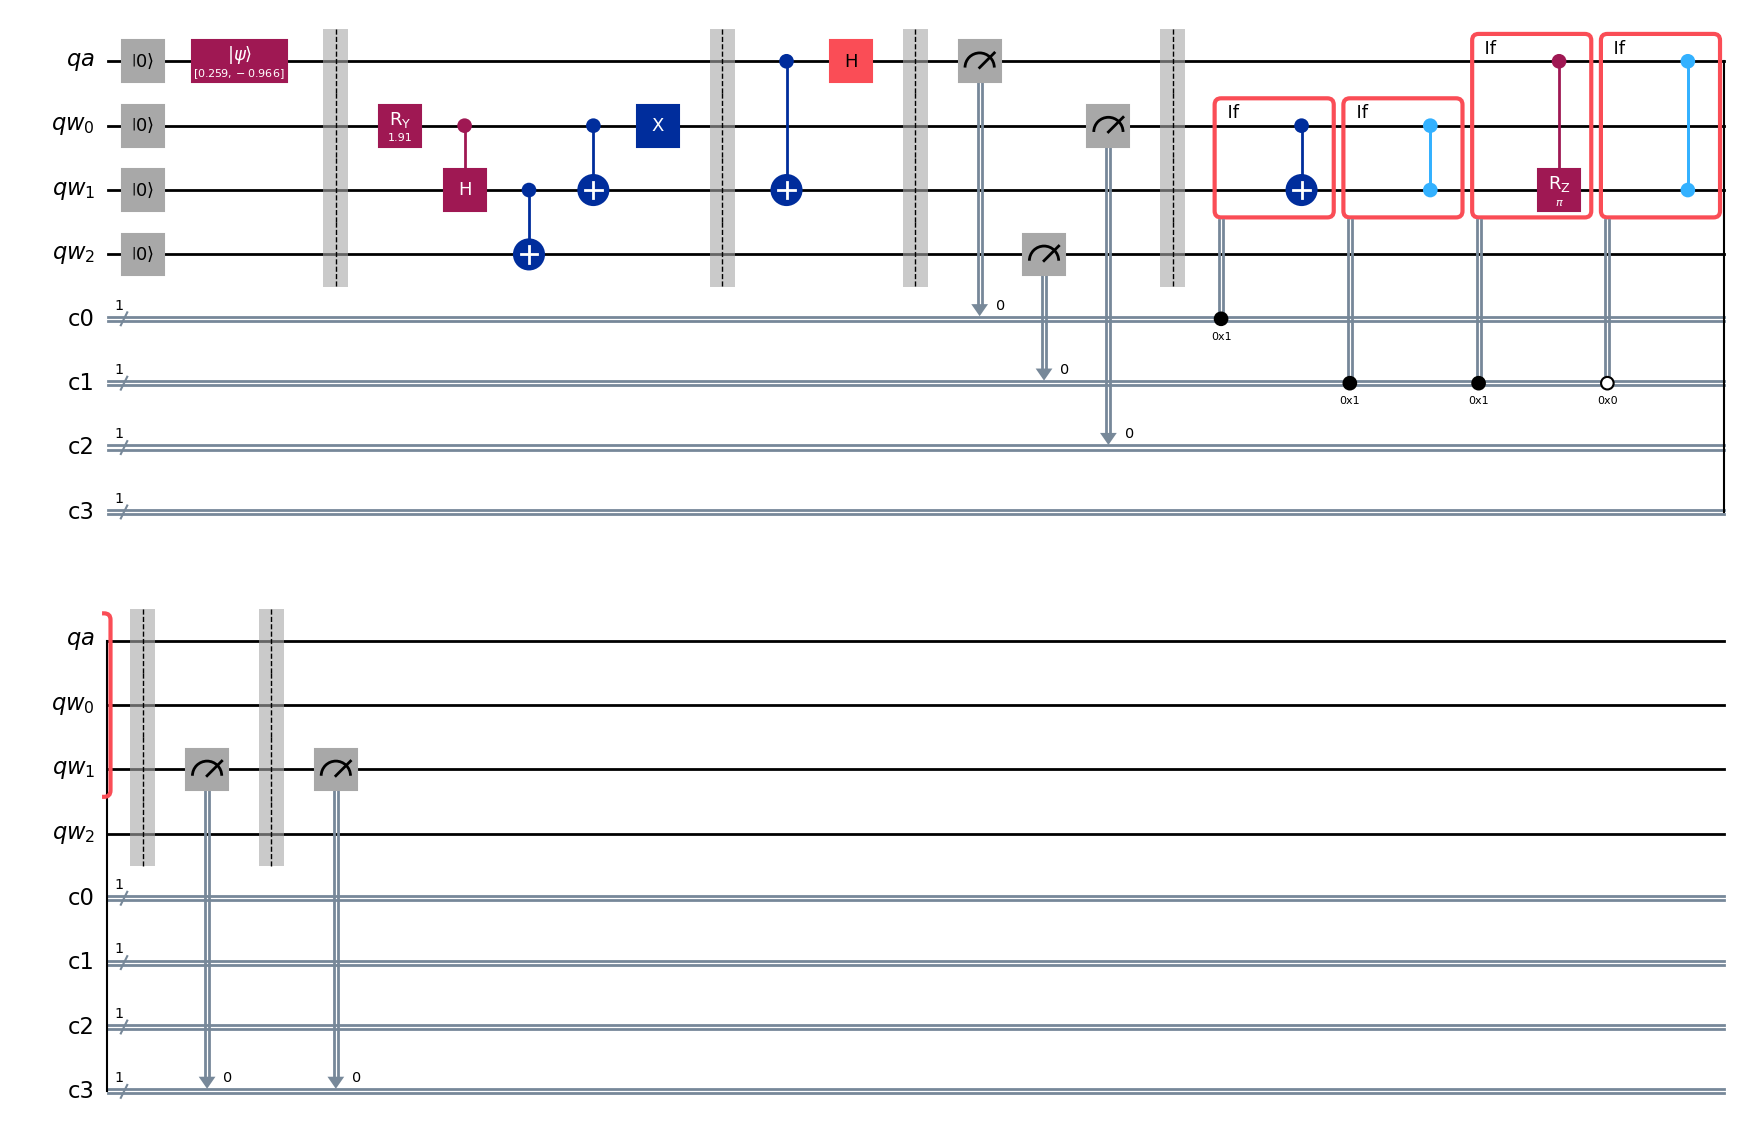

In [24]:
# Redefinir circuito SIN condicionales anidados

# Registros
qa = QuantumRegister(1, "qa")   # qubit de Alice
qw = QuantumRegister(3, "qw")   # w-state channel
c0 = ClassicalRegister(1, "c0") # medida de w[0]
c1 = ClassicalRegister(1, "c1") # medida de Alice Z
c2 = ClassicalRegister(1, "c2") # medida de Alice X
c3 = ClassicalRegister(1, "c3") # medida final de Bob

qc = QuantumCircuit(qa, qw, c0, c1, c2, c3)

# 1) Estado de Alice fijo
alpha = np.sin(pi/12)
beta  = np.cos(pi/12)*np.exp(1j*pi)
psi   = Statevector([alpha, beta])

display(array_to_latex(Statevector(psi), prefix="\\ket{\psi_{Alice}} = "))
print(psi)

qc.reset(qa[0])
qc.reset(qw[0])
qc.reset(qw[1])
qc.reset(qw[2])

# 2) Inicializar Alice y W
qc.initialize(psi.data, qa[0])
qc.barrier()


# 3) Preparar W estándar en w[0],w[1],w[2]
qc.ry(2*np.arccos(1/np.sqrt(3)), qw[0])
qc.ch(qw[0],qw[1])
qc.cx(qw[1],qw[2])
qc.cx(qw[0],qw[1])
qc.x(qw[0])
qc.barrier()


# 4) Medir selector w[0]
qc.cx(qa[0], qw[1])
qc.h(qa[0])
qc.barrier()

# 5) mediciones iniciales (canal clasico)

qc.measure(qa[0],c0[0])
qc.measure(qw[2],c1[0])
qc.measure(qw[0],c2[0])
qc.barrier()

# 6) compuertas condicionadas (parte 1)


with qc.if_test((c0,1)):
  qc.cx(qw[0],qw[1])
with qc.if_test((c1,1)):
  qc.cz(qw[0],qw[1])


# 7) compuertas condicionadas (parte 2)


with qc.if_test((c1,1)):
  qc.crz(pi, qa[0], qw[1])
with qc.if_test((c1,0)):
  qc.cz(qa[0], qw[1])

# Descomentar las siguientes lineas si se desea emplear la última corrección condicional sobre el qubit m.
# OJO, SI DESEA EJECUTAR EN HW REAL, MANTENGALAS COMENTADAS. EL SOPORTE PARA CONDICIONALES ANIDADOS FUE REMOVIDO
# Si solo desea simular con AER SIMULATOR, puede descomentarlas.

#with qc.if_test((c0,0)):
#  with qc.if_test((c2,0)):
#    with qc.if_test((c1,0)):
#      qc.x(qw[1])

qc.barrier()
qc.measure(qw[1], c3[0])
qc.barrier()
qc.measure(qw[1], c3[0])
# Gráfica del circuito completo de Teletransportación Cuántica
qc.draw('mpl')
#plt.show()

#(imagen grande, clicar sobre ella para visualizarla completa. Si incluyó condicionales anidados para corrección adicional, probablemente se dibujen debajo)

In [25]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum",
                               token='e9b0b3f00cc5d805071ee6698444fb9424b731b63f0eab7c9b1ec2ad47def554afe4276edcc877819b78179a8d84dd6f55d41cb67011f2a875efb66b49efd9a2')

backend = service.backend(name='ibm_sherbrooke')
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc2_transpiled = pm.run(qc)

<ipython-input-25-f63e0c2e1077>:4: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(channel="ibm_quantum",
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/

In [26]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler2run = Sampler(mode=backend)

# Define the number of shots for the execution.
shotno=1024

# Run the circuit on a real quantum computer. NB! This may take a while.
job2 = sampler2run.run([qc2_transpiled], shots= shotno)

# ID del Job para rastrear la ejecución del circuito en tiempo real.
print(f">>> Job ID: {job2.job_id()}")

# Consulta del estado de la ejecución del circuito cuántico
print(f">>> Job Status: {job2.status()}")

>>> Job ID: d0xgq8dhtw7g008qabb0
>>> Job Status: QUEUED


In [42]:
# Consulta del estado de la ejecución del circuito cuántico
print(f">>> Job Status: {job2.status()}")

>>> Job Status: DONE


####***3.4.1. En dicha ejecución real, mida el estado cuántico recibido por “Bob”, y evalúe si las amplitudes de los kets |𝟎⟩ y |𝟏⟩ corresponden según lo esperado.*** ####

In [43]:
# recuperar job del listado de workloads del usuario.

from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='e9b0b3f00cc5d805071ee6698444fb9424b731b63f0eab7c9b1ec2ad47def554afe4276edcc877819b78179a8d84dd6f55d41cb67011f2a875efb66b49efd9a2'
)
job = service.job('d0xgq8dhtw7g008qabb0')
job_result = job.result()

# To get counts for a particular pub result, use
#
# pub_result = job_result[<idx>].data.<classical register>.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register.
# You can use circuit.cregs to find the name of the classical registers.

<ipython-input-43-52143b945dd9>:5: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(


In [48]:
pub_result = job_result[0].data.c3.get_counts()
print(pub_result)

{'0': 533, '1': 491}


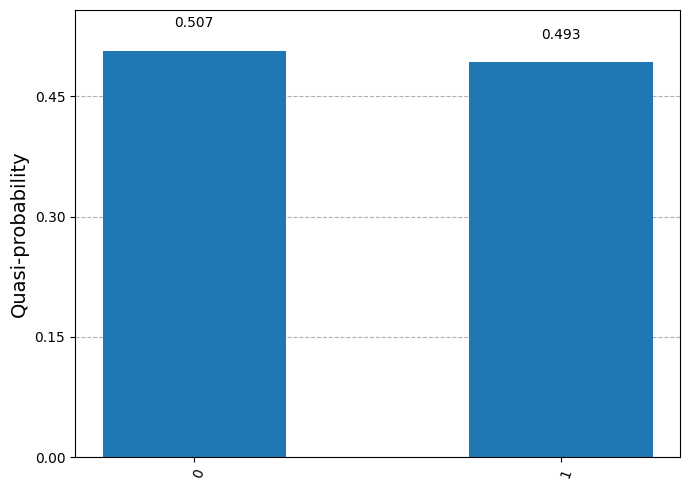

In [ ]:
plot_distribution(pub_result)

AQUI SE RECUPERAN LOS DATOS DEL MISMO CIRCUITO, PERO IMPLEMENTADO DESDE EL IBM COMPOSER:

In [71]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='e9b0b3f00cc5d805071ee6698444fb9424b731b63f0eab7c9b1ec2ad47def554afe4276edcc877819b78179a8d84dd6f55d41cb67011f2a875efb66b49efd9a2'
)
job = service.job('d0xeytkhtw7g008qa17g')
job_result = job.result()

# To get counts for a particular pub result, use
#
# pub_result = job_result[<idx>].data.<classical register>.get_counts()
#pub_result = job_result[0].data.c3
#print(qc_transpiled.cregs)
#print(job_result)

<ipython-input-71-58cdcea10158>:3: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(


In [51]:
from collections import Counter

# Extrae los samples de cada registro clásico
data = job_result['results'][0]['data']
samples_c0 = [bin(int(x, 16))[2:].zfill(1) for x in data['c0']['samples']]
samples_c1 = [bin(int(x, 16))[2:].zfill(1) for x in data['c1']['samples']]
samples_c2 = [bin(int(x, 16))[2:].zfill(1) for x in data['c2']['samples']]
samples_c3 = [bin(int(x, 16))[2:].zfill(1) for x in data['c3']['samples']]

# Combina las muestras índice a índice en cadenas de bits (orden deseado: c0 c1 c2 c3)
combined = [
    samples_c0[i] + samples_c1[i] + samples_c2[i] + samples_c3[i]
    for i in range(len(samples_c0))
]

# Crea un contador como el que genera get_counts()
counts = Counter(combined)

print(counts)



Counter({'0011': 157, '1001': 153, '0000': 152, '1101': 146, '0101': 135, '1011': 134, '1000': 29, '1100': 27, '0001': 25, '0100': 23, '1010': 21, '0010': 19, '0111': 1, '1110': 1, '0110': 1})


In [52]:
from collections import Counter

# Este es tu Counter original con los resultados de medición de 4 bits:
counts = Counter({'0011': 157, '1001': 153, '0000': 152, '1101': 146, '0101': 135,
                  '1011': 134, '1000': 29, '1100': 27, '0001': 25, '0100': 23,
                  '1010': 21, '0010': 19, '0111': 1, '1110': 1, '0110': 1})

# Crear un nuevo Counter solo para el bit de Bob (último bit de la clave)
bob_counts = Counter()

for key, count in counts.items():
    bob_bit = key[-1]  # último bit → c3 = w[1] (Bob)
    bob_counts[bob_bit] += count

# Resultado
print(bob_counts)


Counter({'1': 751, '0': 273})


In [53]:
# 1. Extraer distribución de Bob (último bit de cada string)
bob_counts = Counter()
for key, count in counts.items():
    bob_bit = key[-1]
    bob_counts[bob_bit] += count

# 2. Normalizar la distribución
total_counts = sum(bob_counts.values())
bob_probs = {bit: count / total_counts for bit, count in bob_counts.items()}

#####3.4.2. Compare esta información recibida por “Bob” en la ejecución real, con la información recibida en la simulación realizada en el ítem 3.3. Calcule la tasa de error de esta información recibida.#####

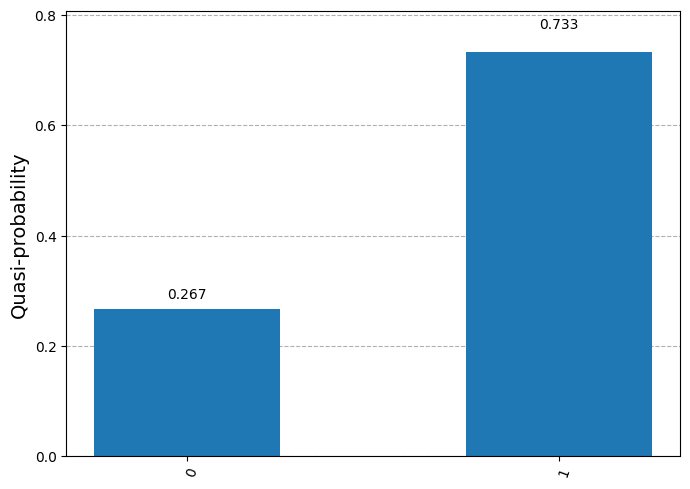

In [56]:
plot_distribution(bob_probs, )

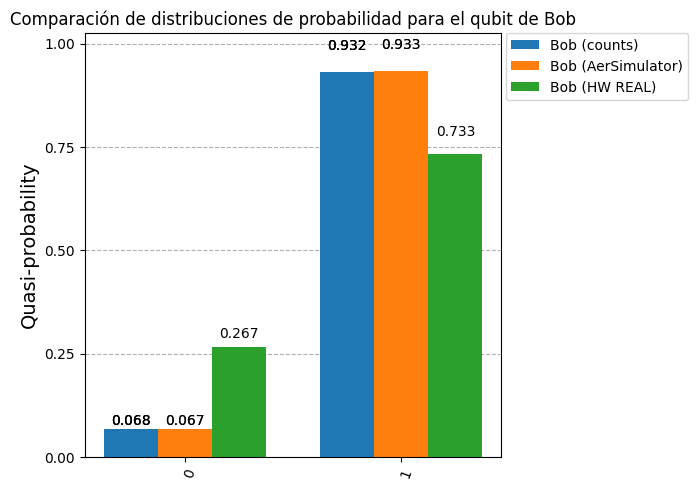

In [57]:
# Comparación
plot_distribution(
    [probs_counts, probs_sv, bob_probs],
    legend=['Bob (counts)', 'Bob (AerSimulator)', 'Bob (HW REAL)'],
    title='Comparación de distribuciones de probabilidad para el qubit de Bob'
)

### 3.5. A fin de reducir la tasa de error presentada, realice ahora una mitigación del error en la medida final de su circuito, usando la Extensión Mthree de Qiskit siguiendo el tutorial explicado en clase ###

#####3.5.1. Presente los histogramas comparativos que indiquen la mejora en las distribuciones de probabilidad esperadas. #####

In [65]:
backend = service.backend(name='ibm_sherbrooke')

mit = mthree.M3Mitigation(backend)
mit.cals_from_system(range(qc.num_qubits))

mitigate_quasi = mit.apply_correction(bob_counts, range(1))
mitigate_probs = mitigate_quasi.nearest_probability_distribution()

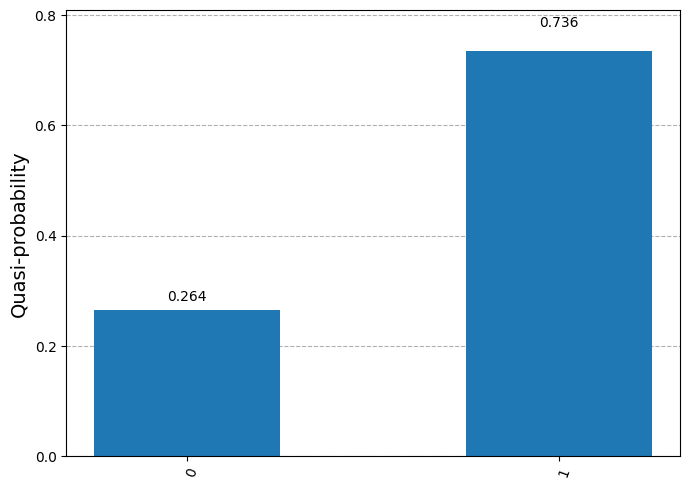

In [66]:

plot_distribution(mitigate_probs)

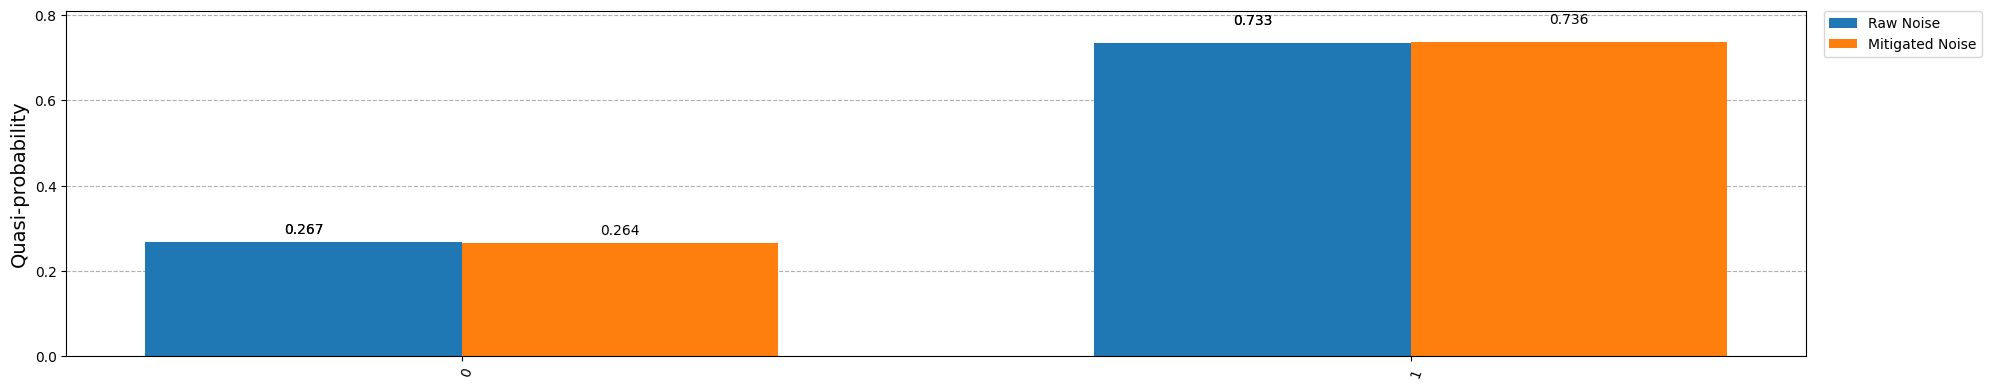

In [67]:

plot_distribution([bob_counts, mitigate_probs], figsize=(20,4), legend=['Raw Noise', 'Mitigated Noise'])

De lo anterior, se infiere que si bien el efecto del ruido en el HW real no fue devastador para la información, hay una ligera mejora al usar la mitigación de errores de mthree. Esto se confirma, debido a que los resultados mitigados se acercan un poco más a los ideales (más alta probabilidad de 1s, y más baja probabilidad de 0s). Es de esperarse que la mitigación de errores pueda tener una mayor utilidad en estados de más de 1 qubit, en donde el aumento en el número de datos requiere de una mayor sensibilidad para su recuperación. En este caso, como bob solo recupera amplitudes para un unico qubit, no hay cabida a equivocarse pues tanto el cero como el uno están suficientemente espaciados en el espacio estadístico.

##Análisis de resultados y conclusiones (30%)##

En esta práctica de laboratorio se ha implementado un protocolo de teletransportación cuántica utilizando un estado W como canal compartido de entrelazamiento entre Alice y Bob. Esta elección resulta particularmente interesante, ya que los estados W poseen propiedades de robustez frente a la pérdida de qubits, y han sido estudiados como alternativa a los estados de Bell en contextos donde se desea mantener cierta resiliencia a la decoherencia o a errores de medida. No obstante, este circuito, al implicar más lógica condicional y correcciones, podríá alargar el tiempo de ejecución, haciendo que la decoherencia pueda tener cierta inflencia.

###**Simulación ideal vs. hardware real**###

Los resultados obtenidos a través de simulación ideal *(AerSimulator con statevector)* y simulación basada en conteo de medidas *(AerSimulator con shots)* han demostrado un comportamiento altamente coherente con la predicción teórica: la reconstrucción del estado original preparado por Alice en el qubit final de Bob se refleja con gran precisión. Esto valida tanto la corrección de la implementación como la aplicabilidad del desarrollo matemático que fundamenta este protocolo.

En contraste, la ejecución sobre hardware cuántico real (IBM Sherbrooke) mostró desviaciones notables. Si bien el estado esperado (|1⟩ en la mayoría de las ejecuciones) seguía teniendo la mayor probabilidad, también se registraron valores |0⟩ con una frecuencia no despreciable. Esto se debe a diversos factores inherentes al hardware actual:

- Tiempos de decoherencia limitados.

- Errores en puertas cuánticas, especialmente en compuertas multi-qubit.

- **Falta de lógica condicional de corrección (NOT con condicionales anidados remivida)**


-
###**Topología del dispositivo y asignación automática de qubits físicos no óptimos para las conexiones necesarias.**###

Estos resultados revelan la brecha existente entre circuitos teóricamente viables y su implementación práctica. Para disminuir dicha brecha, se aplicó mitigación de errores utilizando la librería mthree, con resultados favorables: la distribución se acercó más a la ideal, lo que demuestra el valor de técnicas de postprocesamiento para aumentar la fidelidad de los resultados. No obstante, el hecho de que el problema radique en la construcción del circuito (su longitud y su falta de logica condicional estricta), la mitigación mthree no podrá hacer mayor cosa para convertir los resultados obtenidos en los calculados matematicamente o los simulados mediante el simulador ideal.

-
###**Aprovechamiento del qubit m**###
El protocolo implementado incluye un qubit intermedio (denotado  "qubit m") que actúa como qubit de corrección. Este qubit tiene una función crucial: Realizar correcciones adicionales para garantizar la teletransportación cuántica. Sin embargo, y el hecho de que deba implementarse con condicionales anidados hace que su implementación en HW real sea un reto considerable. Este qubit podría implementarse para otros menesteres, como filtrado de resultados (aunque no se recupere un estado, se podríá detectar cuándo se obtuvo el resultado correcto y cuando no. Esto podría servir para hacer un sistema criptograficamente resistente)

-
###**Comparación con el protocolo de Bell**###
Comparado con el esquema de teletransportación estándar basado en estados de Bell, el enfoque con estado W presenta diferencias estructurales:

**Ventajas:**

- Mayor tolerancia a la pérdida de qubits.

- Posibilidad de extender el canal a esquemas multipartitos.

- Robusteza contra la decoherencia local.

**Desventajas:**

-Mayor complejidad en la preparación del estado: sintetizar un estado W requiere más compuertas que un Bell, lo que implica circuitos más profundos y vulnerables al ruido.

- Correcciones más sofisticadas que requieren control clásico no trivial.

- Limitaciones del hardware real y del control clásico.

-

Uno de los desafíos más notables fue la reducción del soporte de operaciones condicionales (if_test, c_if, estructuras anidadas) en los compiladores más recientes de Qiskit para circuitos dinámicos. Esto representa una limitación práctica significativa, ya que muchos protocolos dependen del control clásico para aplicar correcciones en tiempo real. El soporte varía entre backends y versiones de Qiskit, lo cual obligó a adoptar una estructura de circuito más lineal y menos expresiva que la planeada inicialmente.

***Por ello, se recomienda:***

- Considerar el uso de versiones anteriores de Qiskit (por ejemplo, Qiskit 0.43.x) con qiskit-ibm-provider 0.7.x y qiskit-ibm-runtime 0.11.x, que mantienen compatibilidad con c_if y otros mecanismos clásicos de control.

- Verificar las capacidades del backend seleccionado (e.g., IBM Sherbrooke) antes de diseñar el protocolo, ya que no todos los dispositivos soportan dinámicas condicionales o circuitos con estructuras de retroalimentación.

-

###**Conclusiones generales del trabajo realizado en esta Práctica de Laboratorio**##

- ***Validación de un protocolo cuántico complejo:***   

   Se logró con éxito la implementación completa de un esquema de teletransportación cuántica con estado W, tanto en simuladores como en hardware real. Esta práctica no solo permitió explorar un canal de entrelazamiento alternativo, sino también demostrar experimentalmente su funcionalidad.

- ***Aplicación del desarrollo matemático a la implementación física***
   El circuito diseñado refleja fielmente el procedimiento formal derivado de la teoría de estados W. No obstante, la traducción de estas operaciones al lenguaje de compuertas disponibles en hardware IBM presenta retos computacionales, como la profundidad del circuito y la propagación del error.

- ***Conciencia de las limitaciones actuales del hardware cuántico***
   Las diferencias entre la ejecución simulada y la real evidencian el impacto del ruido cuántico. Las técnicas de mitigación, si bien no son perfectas, permiten recuperar parcialmente la fidelidad del estado objetivo. Esto demuestra la importancia de combinar técnicas físicas y computacionales para alcanzar mejores resultados en entornos reales.

- ***Importancia del control clásico en circuitos dinámicos***
   Se comprobó que los esquemas con compuertas condicionadas aún enfrentan limitaciones prácticas en hardware actual. La falta de soporte completo para estructuras clásicas if_test y c_if, y su eliminación en versiones recientes de Qiskit, exige estrategias alternativas. Esto abre un campo de investigación y desarrollo tanto en software de control cuántico como en diseño de circuitos más eficientes.

- ***Relevancia de seleccionar entornos de desarrollo compatibles***
   El uso de versiones más recientes de Qiskit, aunque recomendado por seguridad y soporte, puede suponer una barrera cuando se requieren herramientas específicas como c_if o condicionales anidados. La posibilidad de usar versiones anteriores o congelar entornos puede ser una estrategia razonable en contextos educativos o de investigación avanzada. Incluso, es recomendable considerar el uso de herramientas altamente funcionales aunque anticuadas para ciertas labores, como el IBM Quantum Composer, que permitió simular el HW a partir de instrucciones viejas y obtener un PUB útil para el análisis del impacto del ruido y la mitigación de errores. Es importante notar que Qiskit es una herramienta aún en desarrollo, por lo que usar las últimas versiones de este puede ser contraproducente en tanto la migración de características y el soporte de multiples tecnologías puede no estar disponible de forma inmediata con las versiones lanzadas. No hace falta estar en las versiones Dev. del software para encontrarse con este tipo de problemas de compatibilidad.

### **Reflexión final** ###
Esta práctica ha ofrecido una experiencia integral: desde el diseño lógico del protocolo hasta su ejecución en hardware real. Se ha puesto en evidencia el potencial de los estados W como canales robustos, así como los desafíos técnicos actuales en su implementación. Se destaca la importancia del trabajo multidisciplinar entre teoría, simulación, computación cuántica y procesamiento clásico, así como la necesidad de construir una infraestructura de software más versátil que permita llevar estas ideas del papel al Hardwarw real.